# Report for investigating the Titanic Dataset

## Question Phase
### Question: what factors make people more likely to survive?

Obviously, everyone will be curious about this question once they get the data set. I'll try to answer this question at the beginning.

## Data Wrangling Phase

Loading the csv data into memory, so I can analyze it. I also include the graph libraries like matplotlib here so later I can use them to draw some figures to demonstrate the result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
%matplotlib inline

filename = './titanic-data.csv'
titanic_df = pd.read_csv(filename)

Next, I will try to check the dataset to see if there are some values missing in the csv file. I aim to check the columns Survived, Pclass, Sex, Age, SibSp and Parch, for I will use them in my exploration phase.

In [2]:
print('Total passengers in the dataset: ', end='')
print(titanic_df['PassengerId'].count())

print('Number of Survived values in the dataset: ', end='')
print(titanic_df['Survived'].count())

print('Number of Pclass values in the dataset: ', end='')
print(titanic_df['Pclass'].count())

print('Number of Sex values in the dataset: ', end='')
print(titanic_df['Sex'].count())

print('Number of Age values in the dataset: ', end='')
print(titanic_df['Age'].count())

print('Number of SibSp values in the dataset: ', end='')
print(titanic_df['SibSp'].count())

print('Number of Parch values in the dataset: ', end='')
print(titanic_df['Parch'].count())

Total passengers in the dataset: 891
Number of Survived values in the dataset: 891
Number of Pclass values in the dataset: 891
Number of Sex values in the dataset: 891
Number of Age values in the dataset: 714
Number of SibSp values in the dataset: 891
Number of Parch values in the dataset: 891


All the data is prepared well except the Age column. I will try to some ilegal data in this column.

In [3]:
titanic_df['Age'].isnull().sum()

177

There are 177 values missing in the dataset. I assume the missing ages are distributed similarly to the ages that are present and I will fill those values with the mean age.

In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

## Data Exploration Phase

I learn from books that in Titanic, people in the first class got warnings earlier than the passengers in the other two classes. So I'm interested in the connection between Pclass and the likelihood that people survive after the disaster.

I define the likelihood that people survive here as the survival rate. It can be describe in math as: 
**number of survived people / total number of people in the same category**.

I will calculate the survival rate in each Pclass in the below code block.

In [5]:
Pclass_num_of_people = titanic_df.groupby('Pclass')['PassengerId'].count()
Pclass_survival_num = titanic_df.groupby('Pclass')['Survived'].sum()
Pclass_survival_rate = Pclass_survival_num / Pclass_num_of_people
print(Pclass_survival_rate)

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


The first class has a survival rate 0.63, the second class has a survival rate 0.47 and the third class has a survival rate 0.24. We can draw a conclusion from this figure that people in a higher class are more likely to survive. It seems that those rich people in the first class really got warnings and prepare to escape at that time.

Likewise, I'm interested in the connection between sex and survival rate.

In [6]:
people_grouped_by_sex = titanic_df.groupby('Sex')
survived_people_by_sex = people_grouped_by_sex['Survived'].sum()
total_people_by_sex = people_grouped_by_sex['PassengerId'].count()
survival_rate_by_sex = survived_people_by_sex / total_people_by_sex

print(survival_rate_by_sex)

Sex
female    0.742038
male      0.188908
dtype: float64


From this group of figure, I can see that ladies, girls were far more easy to survive at that time. Yes, 'Ladies first'. And 'Ladies first' means people should take care of the weakness. How about children and the old men/women? e.g. What's the connection between age and the survive rate?

First, I must know the maximum and the minimum age in the dataset so I can divide ages into several ranges.

In [7]:
age_series = titanic_df['Age']

print("Maximum age of the titanic people: ", end='')
print(age_series.max())
print("Minimum age of the titanic people: ", end='')
print(age_series.min())

Maximum age of the titanic people: 80.0
Minimum age of the titanic people: 0.42


Since the minimal age is less than 1 and is estimated as fraction, I will still treate it as an age between 0 - 10. I will group all the people in the titanic into 8 groups by their age: 0 - 10, 10 - 20, 20 - 30, 30 - 40 , 40 - 50, 50 - 60, 60 - 70, 70 - 80. 

In each group, I will calculate their survival rate to demonstrate a clear connection between age and survival rate.

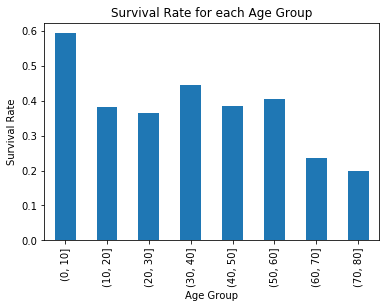

In [8]:
grouped_by_age = titanic_df.groupby(pd.cut(titanic_df["Age"], [0,10,20,30,40,50,60,70,80]));

total_num_of_people_by_age = grouped_by_age.count()['PassengerId']
num_of_survived_people_by_age = grouped_by_age['Survived'].sum()
survival_rate_by_age = num_of_survived_people_by_age / total_num_of_people_by_age

survival_rate_by_age_ax = survival_rate_by_age.plot(kind='bar', title='Survival Rate for each Age Group')
survival_rate_by_age_ax.set_xlabel('Age Group')
survival_rate_by_age_ax.set_ylabel('Survival Rate')

Small children (age <= 10) were more likely to survive. But old men and women (age > 60) were less likely to survive compared with younger men and women. People whose ages were betwen 10 and 60 had similar survive rate around 0.4. It seems that people were more likely to protect children rather than old people. It's just human nature.

According to this [blog](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/), people travelling without their familes might do good when trying to get on the boat. I will try to confirm this opinion by first calculating the family size of each people, and investigating their survival rate on each category.

In [9]:
titanic_df['family'] = titanic_df['SibSp'] + titanic_df['Parch']

print("Maximum family size in the titanic: ", end='')
print(titanic_df['family'].max())
print("Minimum family size in the titanic: ", end='')
print(titanic_df['family'].min())

Maximum family size in the titanic: 10
Minimum family size in the titanic: 0


Since I only got 0 - 10, I will directly use them as the 11 categories.

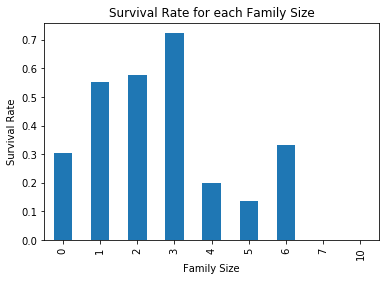

In [10]:
grouped_by_family_size = titanic_df.groupby('family');

total_num_of_people_by_family = grouped_by_family_size.count()['PassengerId']
num_of_survived_people_by_family = grouped_by_family_size['Survived'].sum()
survival_rate_by_family = num_of_survived_people_by_family / total_num_of_people_by_family

survival_rate_by_family_ax = survival_rate_by_family.plot(kind='bar',title='Survival Rate for each Family Size')
survival_rate_by_family_ax.set_xlabel('Family Size')
survival_rate_by_family_ax.set_ylabel('Survival Rate')

We only got 9 family sizes here. And the blog's conclusion is wrong! Actually people travelling with another 2 family members were more likely to survive at that time. People travelling along did not so good as expected from the above figure. I have heard a story that a woman travelling along in Titanic gave up her seat in the boat to let a mother to get together with her child. This kind of moving action might be the reason. 


## Question Phase II

Another thing I care about is money. I usually think the older people will spend more on their trips. So I will try to find the connection between Fare and Age. I also want to emit data for those people under age 20. Most of their travelling fee was payed by their family. It can't reflect the truth of how much money people will spend on their travelling.


## Data Wrangling Phase II

I take out the fare and age data and merge them into another DataFrame.

In [11]:
df_fare_and_age = titanic_df[titanic_df['Age'] > 20]
plot_df = pd.concat([df_fare_and_age['Fare'], df_fare_and_age['Age']], axis=1)

I will try to find out if there are some missing values in the Fare column.

In [12]:
print('Total passengers in the plot dataset: ', end='')
print(plot_df['Age'].count())

print('Number of Fare values in the dataset: ', end='')
print(plot_df['Fare'].count())

Total passengers in the plot dataset: 535
Number of Fare values in the dataset: 535


## Data Exploration Phase II

No missing values. I will plot the dateframe as a scatter plot so I can find the correlation between them.

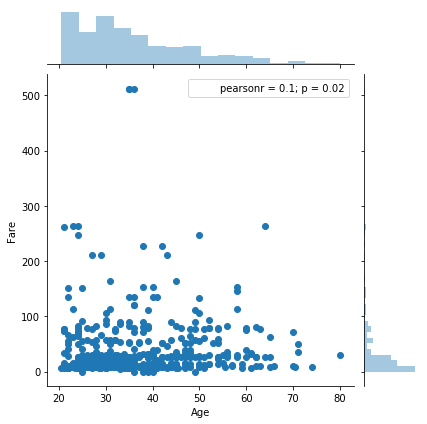

In [13]:
sns.jointplot(x="Age", y="Fare", data=plot_df);

The highest fee was payed by two people between 30 - 40. And the oldest people payed just a little on this trip. The correlation parameter, pearson's R, is 0.1, which means that the fare does not have much correlation with age. It seems that my prediction is totally wrong!

I'm also interested in the fare. How much money did people pay to get on the ship at that time? To explore this, I will first calculate the maximum and minimum value in the 'Fare' column in the Titanic data, then draw histogram(s) to find out the result.

In [14]:
print("Maximum fare: ", end='')
print(titanic_df['Fare'].max())

print("Minimum fare: ", end='')
print(titanic_df['Fare'].min())

Maximum fare: 512.3292
Minimum fare: 0.0


It looks a little strange with minimum fare 0. However, the instruction that comes with the dataset does not state how the fare data is grabed. I just assume it's a special case that someone got a free ticket.

According to the maximum and minimun fare values, I will divide the data into 6 groups: [0, 100), [100, 200), [200, 300), [300, 400), [400, 500), [500, 600). And the following code draw a histogram for the fare data.

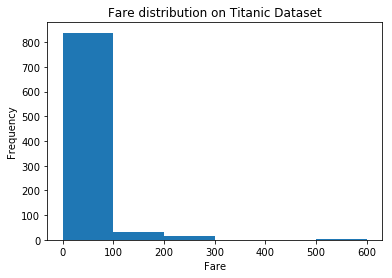

In [15]:
plt.hist(titanic_df['Fare'], bins=[0, 100, 200, 300, 400, 500, 600])
plt.title('Fare distribution on Titanic Dataset')
plt.xlabel('Fare')
plt.ylabel('Frequency')

A lot of data is between [0, 100]. And I'm curious about how they distributed in this range.

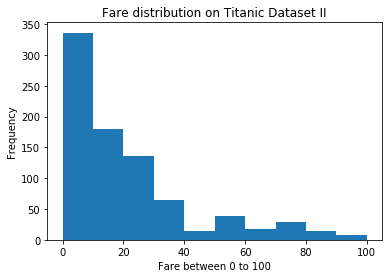

In [16]:
plt.hist(titanic_df[titanic_df['Fare'] <= 100]['Fare'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Fare distribution on Titanic Dataset II')
plt.xlabel('Fare between 0 to 100')
plt.ylabel('Frequency')

A lot of people payed less than 40 dollars to get on the ship. That's cool.

## Draw Conclusion Phase

From the exploration part, I can get this conclusion: if you are in the first class of the ship, you are female, you are younger than 10 and you travel with a 3-people family, than you are more likely to survive in this terrible accident.

However, I do not get sufficient evidences/information on the sample (i.e. the dataset) and my conclusion relies heavily on the sample. If the sample data is not taken out from the whole Titanic people's data evenly, my conclusion will be biased. For example, if the data is only taken from the first 891 rows in the whole Titanic people data, then the connection between age and survival rate will not be accurately. There might be more old men/women survived in the left data, they will make the survival rate more higher in age group (70, 80]. The conclusion will then become "people tend to protect both children and old people when in disaster".

Later, I will confirm the procedure of how the data is obtained to enhance the persuasiveness of my report.